# __Text Classification using LSTM__

Let's see how to classify the text using LSTM (Long Short-Term Memory).

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Steps to  Be Followed:

1. Importing the libraries
2. Defining the hyperparameter
3. Preprocessing the data and printing the lengths of the labels and articles lists.
4. Splitting the data into training and validation sets
5. Initializing a tokenizer and fitting it on the training articles
6. Converting the training articles into sequences using the tokenizer
7. Padding the sequence
8. Printing the length of validation Sequences and the shape of validation padded
9. Training the model
10. Compiling the model
11. Plotting the graph

### Step 1: Importing the libraries
- Import the required libraries

In [2]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
import matplotlib.pyplot as plt


### Step 2: Defining the Hyperparameter
- Set the value of __vocab_size__ to __5000__, representing the size of the vocabulary
- Set the value of __embedding_dim__ to __64__, specifying the dimensionality of the word embeddings
- Set the value of __max_length__ to __200__, indicating the maximum length of input sequences
- Set the value of __padding_type__ to __post__, specifying that padding should be added at the end of sequences
- Set the value of __trunc_type__ to __post__, indicating that truncation should be applied at the end of sequences
- Set the value of __oov_tok__ to __OOV__, representing the token to be used for out-of-vocabulary words
- Set the value of __training_portion__ to __0.8__, representing the proportion of data to be used for training

In [3]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
padding_type = 'post'
trunc_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

### Step 3: Preprocessing the Data and Printing the Lengths of the Labels and Articles Lists.

- Define two empty lists, articles, and labels to store the articles and labels, respectively
- Read the contents of the **bbc-text.csv** file using csv.reader and iterate through each row
- Extract the label from the first column of each row and append it to the labels list
- Process the article from the second column by removing stopwords and replacing consecutive spaces with a single space and then append it to the articles list
- Print the lengths of the labels and articles lists to display the number of labels and processed articles, respectively

In [4]:
articles = []
labels = []

with open("bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

2225
2225


__Observations:__
- There are only **2,225** articles in the data.
- Then, we split into a training set and validation set, according to the parameter we set earlier, 80% for training, and 20% for validation.

### Step 4: Splitting the Data into Training and Validation Sets
- Calculate the **train_size** by multiplying the length of the articles list with __training_portion__ and converting it to an integer
- Create **train_articles** by slicing the articles list from index **0** to **train_size**
- Create **train_labels** by slicing the labels list from index** 0 **to **train_size**
- Create validation_articles by slicing the articles list from **train_size** onward
- Create **validation_labels** by slicing the labels list from **train_size** onward
- Print the **train_size** to display the calculated value

- The lengths of **train_articles**, **train_labels**, **validation_articles**, and **validation_labels** represent the number of items in each list.

In [5]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


__Observations:__
- The value of **train_size** is calculated based on the proportion of training data.
- The lengths of **train_articles**, **train_labels**, **validation_articles**, and **validation_labels** representing the number of items in each list.

### Step 5: Initializing a Tokenizer and Fitting It on the Training Articles

- Initialize a **Tokenizer** object named tokenizer with the specified parameters: **num_words** representing the vocabulary size and **oov_token** representing the out-of-vocabulary token
- Fit the tokenizer on the training articles **(train_articles)** using the **fit_on_texts** method
- This step updates the tokenizer's internal word index based on the words in the training articles
- Assign the word index obtained from the tokenizer to the variable **word_index**
- Extract the first 10 items from the word_index dictionary
- Print the resulting dictionary

In [6]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

In [7]:
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10}

__Observations:__
- The code prints a dictionary containing the first 10 items from the word_index dictionary.
- These items represent a subset of the word-to-index mappings generated by the tokenizer.

### Step 6: Converting the Training Articles into Sequences Using the Tokenizer
- Convert the training articles **(train_articles)** into sequences using the **texts_to_sequences** method of the tokenizer object and assign the result to **train_sequences**
- Print the sequence representation of the 11th training article (index 10) by accessing **train_sequences[10]**

In [8]:
train_sequences  = tokenizer.texts_to_sequences(train_articles)

print(train_sequences[10])

[2432, 1, 225, 4996, 22, 641, 587, 225, 4996, 1, 1, 1662, 1, 1, 2432, 22, 565, 1, 1, 140, 278, 1, 140, 278, 796, 822, 662, 2308, 1, 1145, 1693, 1, 1721, 4997, 1, 1, 1, 1, 1, 4739, 1, 1, 122, 4515, 1, 2, 2874, 1506, 352, 4740, 1, 52, 341, 1, 352, 2172, 3962, 41, 22, 3796, 1, 1, 1, 1, 542, 1, 1, 1, 835, 631, 2367, 347, 4741, 1, 365, 22, 1, 787, 2368, 1, 4303, 138, 10, 1, 3665, 682, 3531, 1, 22, 1, 414, 822, 662, 1, 90, 13, 633, 1, 225, 4996, 1, 599, 1, 1693, 1021, 1, 4998, 807, 1864, 117, 1, 1, 1, 2975, 22, 1, 99, 278, 1, 1606, 4999, 542, 492, 1, 1445, 4742, 778, 1320, 1, 1861, 10, 33, 641, 319, 1, 62, 478, 565, 301, 1507, 22, 479, 1, 1, 1665, 1, 797, 1, 3067, 1, 1364, 6, 1, 2432, 565, 22, 2972, 4736, 1, 1, 1, 1, 1, 850, 39, 1825, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1507, 1342, 374, 20, 63, 883, 1097, 4304, 247]


__Observation:__
- The code prints the sequence representation of the 11th training article (index 10) in the **train_sequences** list.
- The output is a list of integers, where each integer represents the index of a word in the tokenizer's word index vocabulary that corresponds to a word in the article.

### Step 7: Padding the Sequence
- Pad the sequences in **train_sequences** using the **pad_sequences** function
- Set the maximum length of the padded sequences to **max_length**
- Specify the padding type as **padding_type** and the truncation type as **trunc_type**
- Assign the padded sequences to the variable **train_padded**

In [9]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [10]:
print(train_sequences[10])

[2432, 1, 225, 4996, 22, 641, 587, 225, 4996, 1, 1, 1662, 1, 1, 2432, 22, 565, 1, 1, 140, 278, 1, 140, 278, 796, 822, 662, 2308, 1, 1145, 1693, 1, 1721, 4997, 1, 1, 1, 1, 1, 4739, 1, 1, 122, 4515, 1, 2, 2874, 1506, 352, 4740, 1, 52, 341, 1, 352, 2172, 3962, 41, 22, 3796, 1, 1, 1, 1, 542, 1, 1, 1, 835, 631, 2367, 347, 4741, 1, 365, 22, 1, 787, 2368, 1, 4303, 138, 10, 1, 3665, 682, 3531, 1, 22, 1, 414, 822, 662, 1, 90, 13, 633, 1, 225, 4996, 1, 599, 1, 1693, 1021, 1, 4998, 807, 1864, 117, 1, 1, 1, 2975, 22, 1, 99, 278, 1, 1606, 4999, 542, 492, 1, 1445, 4742, 778, 1320, 1, 1861, 10, 33, 641, 319, 1, 62, 478, 565, 301, 1507, 22, 479, 1, 1, 1665, 1, 797, 1, 3067, 1, 1364, 6, 1, 2432, 565, 22, 2972, 4736, 1, 1, 1, 1, 1, 850, 39, 1825, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1507, 1342, 374, 20, 63, 883, 1097, 4304, 247]


__Observations:__
- The code prints the sequence representation of the 11th training article (index 10) in the **train_sequences** list.
- The output is a list of integers, where each integer represents the index of a word in the tokenizer's word index vocabulary that corresponds to a word in the article.

In [11]:
print(train_padded[10])

[2432    1  225 4996   22  641  587  225 4996    1    1 1662    1    1
 2432   22  565    1    1  140  278    1  140  278  796  822  662 2308
    1 1145 1693    1 1721 4997    1    1    1    1    1 4739    1    1
  122 4515    1    2 2874 1506  352 4740    1   52  341    1  352 2172
 3962   41   22 3796    1    1    1    1  542    1    1    1  835  631
 2367  347 4741    1  365   22    1  787 2368    1 4303  138   10    1
 3665  682 3531    1   22    1  414  822  662    1   90   13  633    1
  225 4996    1  599    1 1693 1021    1 4998  807 1864  117    1    1
    1 2975   22    1   99  278    1 1606 4999  542  492    1 1445 4742
  778 1320    1 1861   10   33  641  319    1   62  478  565  301 1507
   22  479    1    1 1665    1  797    1 3067    1 1364    6    1 2432
  565   22 2972 4736    1    1    1    1    1  850   39 1825  675  297
   26  979    1  882   22  361   22   13  301 1507 1342  374   20   63
  883 1097 4304  247    0    0    0    0    0    0    0    0    0    0
    0 

__Observation:__
- The code prints the padded sequence representation of the 11th training article.
- The output is a list of integers representing the word indices of the corresponding words in the article, after applying padding to ensure a consistent length (max_length) for all sequences.

### Step 8: Printing the Length of Validation Sequences and the Shape of Validation Padded
- Convert the validation articles into sequences using the tokenizer and pad the sequences to a maximum length. Assign the result to **validation_padded**
- Print the length of **validation_sequences** and the shape of **validation_padded**
- Create a tokenizer for the labels and fit it on the labels list
- Convert the training and validation labels into sequences using the label tokenizer and store the results in **training_label_seq** and **validation_label_seq** as NumPy arrays

In [12]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


__Observations:__
- The length of **validation_sequences**, indicating the number of sequences in the validation set.
- The shape of **validation_padded**, representing the dimensions of the padded validation sequences.

In [13]:
print(set(labels))

{'politics', 'entertainment', 'tech', 'business', 'sport'}


__Observation:__
- The output is a set containing the unique labels: 'business', 'tech', 'entertainment', 'politics', and 'sport'.

In [14]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

__Observations:__
- The output of this code is the conversion of label sequences for the training and validation sets.
- The **training_label_seq** and **validation_label_seq** are NumPy arrays containing the label sequences for the respective sets, based on the word index mapping generated by the **label_tokenizer**

### Step 9: Training the Model
- Create a sequential model using **tf.keras.Sequential()**
- Add an embedding layer to the model with the specified vocabulary size **(vocab_size)** and embedding dimension **(embedding_dim)**
- Add a bidirectional LSTM layer to the model with the same embedding dimension
- Add a dense layer to the model with the embedding dimension as the number of units and **relu** activation function
- Add a dense layer with 6 units and the **softmax** activation function to the model
- Print a summary of the model's architecture using **model.summary()**

In [15]:
model = tf.keras.Sequential([

    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),

    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 394694 (1.51 MB)
Trainable params: 394694 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


__Observation:__
- The code outputs a summary of the model's architecture, including the number of parameters and the shape of each layer in the model.

### Step 10: Compiling the Model
- Compile the model using **model.compile()** with the loss function set to **sparse_categorical_crossentropy**, the optimizer set to **adam**, and the metrics set to **accuracy**
- Set the number of epochs to 10
- Train the model using **model.fit()** with the training padded sequences **(train_padded)** and training label sequences **(training_label_seq)**
- Specify the number of epochs as **num_epochs**, the validation data as the validation padded sequences **(validation_padded)** and validation label sequences **(validation_label_seq)**, and **verbose** mode as **2**

In [16]:

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

num_epochs = 10

history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)


Epoch 1/10
56/56 - 21s - loss: 1.5836 - accuracy: 0.3034 - val_loss: 1.4772 - val_accuracy: 0.3236 - 21s/epoch - 370ms/step
Epoch 2/10
56/56 - 13s - loss: 0.8287 - accuracy: 0.7124 - val_loss: 0.6487 - val_accuracy: 0.7775 - 13s/epoch - 234ms/step
Epoch 3/10
56/56 - 13s - loss: 0.3430 - accuracy: 0.8927 - val_loss: 0.3523 - val_accuracy: 0.8787 - 13s/epoch - 227ms/step
Epoch 4/10
56/56 - 13s - loss: 0.1727 - accuracy: 0.9551 - val_loss: 0.4467 - val_accuracy: 0.8539 - 13s/epoch - 227ms/step
Epoch 5/10
56/56 - 13s - loss: 0.0874 - accuracy: 0.9742 - val_loss: 0.2809 - val_accuracy: 0.9034 - 13s/epoch - 231ms/step
Epoch 6/10
56/56 - 12s - loss: 0.0137 - accuracy: 0.9978 - val_loss: 0.2105 - val_accuracy: 0.9326 - 12s/epoch - 210ms/step
Epoch 7/10
56/56 - 12s - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.2021 - val_accuracy: 0.9483 - 12s/epoch - 216ms/step
Epoch 8/10
56/56 - 12s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2039 - val_accuracy: 0.9461 - 12s/epoch - 221ms/step
Epoch 9/

__Observations:__
- The code trains the model for the specified number of epochs and records the training and validation accuracy and loss metrics.
- The output is an object named history that contains information about the training process, such as the loss and accuracy values at each epoch.

### Step 11: Plotting the Graph
- Define a function named **plot_graphs** that takes history and string as inputs. Inside the function, plot the training and validation values of the given metric (string) from the history object using **plt.plot()**
- Set the x-axis label as **Epochs** and the y-axis label as the given metric (string)
- Call the **plot_graphs** function twice, first with **history** and **accuracy** as arguments, and then with **history** and **loss** as arguments
- Display the generated plots showing the training and validation values of the accuracy and loss metrics over the epochs

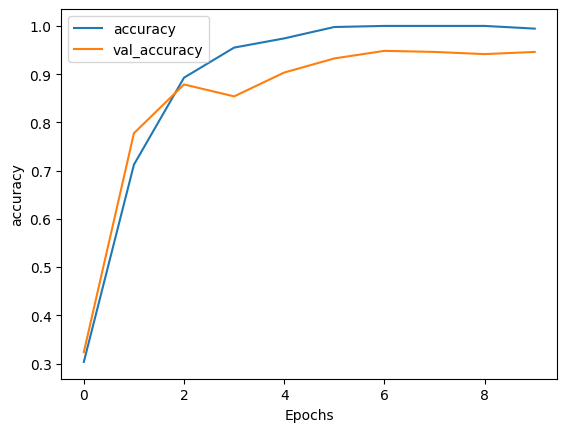

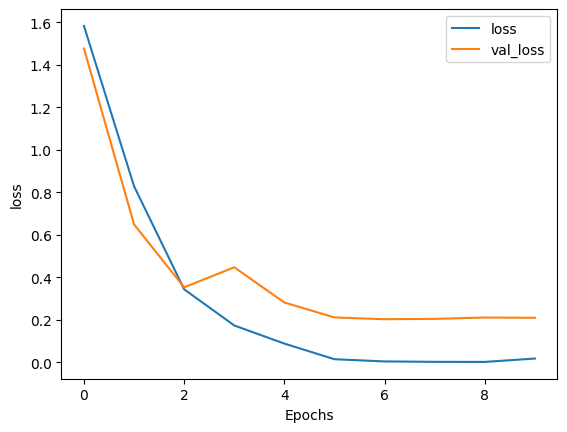

In [17]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")